<a href="https://colab.research.google.com/github/HUSILEBAI/MAGIC_Committed_Glacier_Change/blob/main/Committed_glacier_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

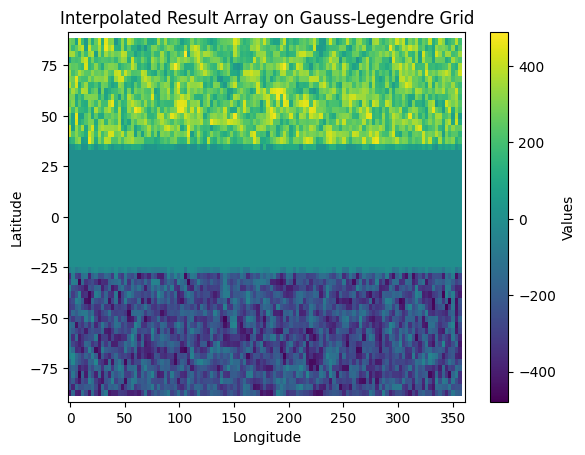

In [15]:
# Set max degree
maxdeg = 60

# Set up Gauss-Legendre grid
N = maxdeg
x, w = np.polynomial.legendre.leggauss(N)
glacier_x = np.arccos(x) * 180 / np.pi - 90
glacier_y = np.linspace(0, 360, 2 * N + 1)[:-1]
glacier_lon, glacier_lat = np.meshgrid(glacier_y, glacier_x)

# Create pairs of coordinates for interpolation
xi = np.column_stack((glacier_lon.ravel(), glacier_lat.ravel()))

# Calculate the number of rows for each category
num_positive_rows = int(0.3 * maxdeg)
num_zero_rows = int(0.35 * maxdeg)
num_negative_rows = maxdeg - num_positive_rows - num_zero_rows

minVal = -500
maxVal = 500

# Generate random numbers for each category
positive_numbers = np.random.uniform(1, maxVal, size=(num_positive_rows, 2 * maxdeg))
zero_numbers = np.zeros((num_zero_rows, 2 * maxdeg))
negative_numbers = np.random.uniform(minVal, -1, size=(num_negative_rows, 2 * maxdeg))

# Concatenate the arrays vertically to form the final 2D array
result_array = np.vstack((positive_numbers, zero_numbers, negative_numbers))

# Shuffle the rows to randomize the order
# np.random.shuffle(result_array)

# Create pairs of coordinates for the result_array
result_x = np.linspace(0, 360, 2 * maxdeg)
result_y = np.linspace(-90, 90, maxdeg)
result_lon, result_lat = np.meshgrid(result_x, result_y)

# Create a 1D grid for interpolation
result_xi = np.column_stack((result_lon.ravel(), result_lat.ravel()))

# Interpolate 'result_array' to the specified grid
interpolated_result_array = griddata(xi, result_array.flatten(), result_xi, method='linear')

# Reshape the interpolated values to match the grid shape
interpolated_result_array = interpolated_result_array.reshape(result_lon.shape)

# Plot the result
# plt.imshow(interpolated_result_array, extent=(0, 360, -90, 90), origin='lower', cmap='viridis')
plt.pcolor(result_lon, result_lat, interpolated_result_array)
plt.title('Interpolated Result Array on Gauss-Legendre Grid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Values')
plt.show()

In [16]:
# Reshape 'result_array' to a column vector, sort, and flip
reshaped_result_array = np.sort(result_array.reshape(60 * 120, 1))

# Calculate cumulative sum
cumsumA = np.cumsum(reshaped_result_array)

# Find the index where the cumulative sum becomes negative
indA = np.argmax(cumsumA <= 0)

# Calculate the number of negative cells
numnegcells = len(cumsumA) - indA

print(f"The number of cells to cut is {numnegcells}")

The number of cells to cut is 364


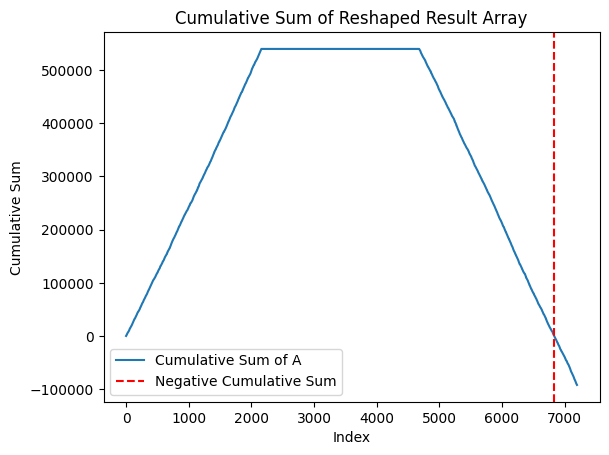

Number of negative cells: 364


In [17]:
# Plot the cumulative sum
plt.plot(cumsumA, label='Cumulative Sum of A')
plt.axvline(x=indA, color='r', linestyle='--', label='Negative Cumulative Sum')
plt.title('Cumulative Sum of Reshaped Result Array')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.show()

print("Number of negative cells:", numnegcells)

### Create random shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def generate_bezier_curve(control_points, num_points):
    t = np.linspace(0, 1, num_points)
    n = len(control_points) - 1
    result = []
    for i in range(num_points):
        p = np.zeros(2)
        for j, point in enumerate(control_points):
            p += point * np.math.comb(n, j) * ((1 - t[i]) ** (n - j)) * (t[i] ** j)
        result.append(p)
    return np.array(result)

def generate_glacier_shape(num_points, control_points):
    t = np.linspace(0, 1, num_points)
    bezier_curve = generate_bezier_curve(control_points, num_points)

    # Apply modifications to resemble a glacier shape
    for i in range(len(control_points) - 1):
        segment_points = bezier_curve[i * (num_points // (len(control_points) - 1)) : (i+1) * (num_points // (len(control_points) - 1)), :]
        segment_points[:, 1] += np.random.normal(scale=0.1, size=num_points // (len(control_points) - 1))  # Add some irregularities

    return bezier_curve

def plot_glacier_shape(points):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], 'k-')
    plt.fill(points[:, 0], points[:, 1], color='lightblue', alpha=0.8)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Glacier-like Shape')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

def plot_triangle_mesh(points, triangles):
    plt.figure(figsize=(6, 6))
    for triangle in triangles:
        plt.plot(points[triangle[[0, 1, 2, 0]], 0], points[triangle[[0, 1, 2, 0]], 1], 'k-')
    #plt.plot(points[:, 0], points[:, 1], 'ro')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Triangle Mesh')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Define control points for the Bézier curve
control_points = np.array([[0, 3], [2, 6], [4, 3], [6, 0], [0, 3]])

# Generate glacier-like shape
num_points = 1000
glacier_points = generate_glacier_shape(num_points, control_points)

# Generate Delaunay triangulation
tri = Delaunay(glacier_points)

# Plot the glacier-like shape
plot_glacier_shape(glacier_points)

# Plot the triangle mesh
# plot_triangle_mesh(glacier_points, tri.simplices)

<ipython-input-78-7b6952d1bf2f>:12: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p += point * np.math.comb(n, j) * ((1 - t[i]) ** (n - j)) * (t[i] ** j)


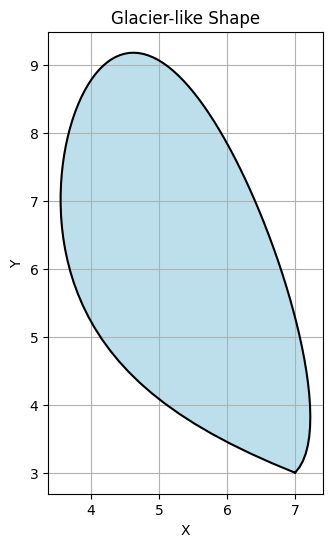

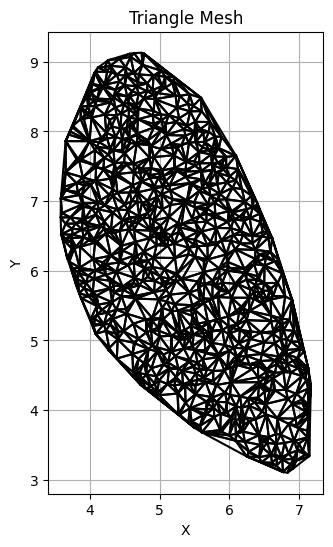

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def generate_bezier_curve(control_points, num_points):
    t = np.linspace(0, 1, num_points)
    n = len(control_points) - 1
    result = []
    for i in range(num_points):
        p = np.zeros(2)
        for j, point in enumerate(control_points):
            p += point * np.math.comb(n, j) * ((1 - t[i]) ** (n - j)) * (t[i] ** j)
        result.append(p)
    return np.array(result)


def generate_smooth_glacier_shape(num_points):
    control_points = np.array([[7, 3], [2, 5], [3, 7], [4, 12], [5,10], [6, 9],  [8, 4], [7, 3]]) # Duplicated first point at the end
    bezier_curve = generate_bezier_curve(control_points, num_points)
    return bezier_curve

def add_random_points_inside_shape(points, num_points):
    # Compute bounding box
    x_min, y_min = np.min(points, axis=0)
    x_max, y_max = np.max(points, axis=0)

    # Initialize list to store points inside the shape
    random_points = []

    # Define the is_point_inside_polygon function
    def is_point_inside_polygon(x, y, poly):
        n = len(poly)
        inside = False
        p1x, p1y = poly[0]
        for i in range(n+1):
            p2x, p2y = poly[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xints = (y-p1y) * (p2x-p1x) / (p2y-p1y) + p1x
                        if p1x == p2x or x <= xints:
                            inside = not inside
            p1x, p1y = p2x, p2y
        return inside

    # Generate random points inside the shape
    while len(random_points) < num_points:
        # Generate a random point inside the bounding box
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)

        # Check if the point is inside the shape
        if is_point_inside_polygon(x, y, points):
            random_points.append([x, y])

    return np.array(random_points)



def plot_glacier_shape(points):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], 'k-')
    plt.fill(points[:, 0], points[:, 1], color='lightblue', alpha=0.8)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Glacier-like Shape')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

def plot_triangle_mesh(points, triangles):
    plt.figure(figsize=(6, 6))
    for triangle in triangles:
        plt.plot(points[triangle[[0, 1, 2, 0]], 0], points[triangle[[0, 1, 2, 0]], 1], 'k-')
    #plt.plot(points[:, 0], points[:, 1], 'ro')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Triangle Mesh')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()



# Generate smooth glacier-like shape
num_points = 100
smooth_glacier_points = generate_smooth_glacier_shape(num_points)

# Add random points inside the shape
num_random_points = 1000
dense_glacier_points = add_random_points_inside_shape(smooth_glacier_points, num_random_points)

# Generate Delaunay triangulation
tri = Delaunay(dense_glacier_points)

# Plot the glacier-like shape
plot_glacier_shape(smooth_glacier_points)

# Plot the dense triangle mesh
plot_triangle_mesh(dense_glacier_points, tri.simplices)

<ipython-input-97-9b51430f6f57>:12: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p += point * np.math.comb(n, j) * ((1 - t[i]) ** (n - j)) * (t[i] ** j)


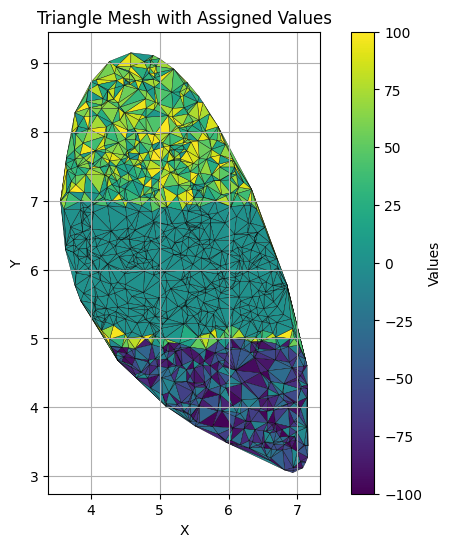

In [116]:
# def divide_mesh_into_parts(tri, percentages):
#     num_triangles = len(tri.simplices)
#     num_first_part = int(num_triangles * percentages[0])
#     num_second_part = int(num_triangles * percentages[1])
#     first_triangles = tri.simplices[:num_first_part]
#     second_triangles = tri.simplices[num_first_part:num_first_part + num_second_part]
#     third_triangles = tri.simplices[num_first_part + num_second_part:]
#     return first_triangles, second_triangles, third_triangles

def assign_values_to_triangles(tri, points):
    values = np.zeros(len(tri.simplices))
    for i, triangle in enumerate(tri.simplices):
        # Get the y-coordinates of the vertices of the triangle
        y_values = points[triangle, 1]
        # Determine the part of the shape based on y-coordinates
        if np.all(y_values <= 5):
            values[i] = np.random.randint(-100, 0)  # negative values for y < 5  # negative values for y < 5
        elif np.all(y_values > 5) and np.all(y_values < 7):
            values[i] = 0   # zero values for 5 <= y < 7
        else:
            values[i] = np.random.randint(1, 101)   # positive values for y >= 7
    return values

def plot_triangle_mesh_with_values(points, triangles, values):
    plt.figure(figsize=(8, 6))
    plt.tripcolor(points[:, 0], points[:, 1], triangles,
                  facecolors=values, edgecolors='k', cmap='viridis')
    plt.colorbar(label='Values')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Triangle Mesh with Assigned Values')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Generate smooth glacier-like shape
num_points = 100
smooth_glacier_points = generate_smooth_glacier_shape(num_points)

# Add random points inside the shape
num_random_points = 1000
dense_glacier_points = add_random_points_inside_shape(smooth_glacier_points, num_random_points)

# Generate Delaunay triangulation
tri = Delaunay(dense_glacier_points)

# Assign values to the triangles based on the y-coordinate of their vertices
values = assign_values_to_triangles(tri, dense_glacier_points)

# Plot the triangle mesh with assigned values
plot_triangle_mesh_with_values(dense_glacier_points, tri.simplices, values)

In [117]:
def calculate_cumulative_sum(values):
    flattened_values = values.flatten()
    cumulative_sum = np.cumsum(flattened_values)
    cumulative_sum_ordered = np.flip(cumulative_sum)
    return cumulative_sum_ordered

# Example usage:
cumulative_sum_values_ordered = calculate_cumulative_sum(values)
#print(cumulative_sum_values_ordered)


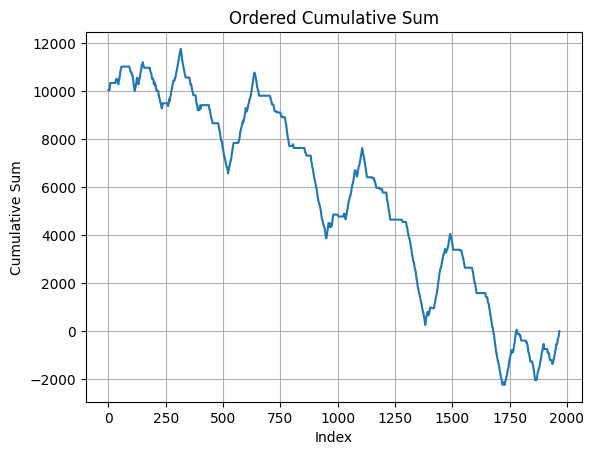

In [118]:
def plot_cumulative_sum(cumulative_sum_values_ordered):
    plt.plot(cumulative_sum_values_ordered)
    plt.xlabel('Index')
    plt.ylabel('Cumulative Sum')
    plt.title('Ordered Cumulative Sum')
    plt.grid(True)
    plt.show()

# Example usage:
plot_cumulative_sum(cumulative_sum_values_ordered)

In [119]:
def find_negative_index(cumulative_sum_values_ordered):
    negative_index = np.argmax(cumulative_sum_values_ordered < 0)
    return negative_index

# Example usage:
negative_index = find_negative_index(cumulative_sum_values_ordered)
print("Index where cumulative sum becomes negative:", negative_index)

Index where cumulative sum becomes negative: 1678


In [120]:
def calculate_negative_cells(cumulative_sum_values_ordered):
    num_negative_cells = np.sum(cumulative_sum_values_ordered < 0)
    return num_negative_cells

# Example usage:
num_negative_cells = calculate_negative_cells(cumulative_sum_values_ordered)
print("Number of negative cells:", num_negative_cells)


Number of negative cells: 288


In [121]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML
# import matplotlib as mpl
# mpl.rcParams['animation.embed_limit'] = 256  # Set the limit to 256 MB or adjust as needed

# def plot_cumulative_sum_animation(cumulative_sum_values_ordered):
#     fig, ax = plt.subplots()
#     def update(frame):
#         ax.clear()  # Clear the current axis
#         ax.plot(range(frame + 1), cumulative_sum_values_ordered[:frame + 1])
#         ax.set_xlabel('Index')
#         ax.set_ylabel('Cumulative Sum')
#         ax.set_title('Ordered Cumulative Sum')
#         ax.grid(True)
#     ani = FuncAnimation(fig, update,
#                         frames=len(cumulative_sum_values_ordered),
#                         interval=10,
#                         repeat=False)
#     plt.close()  # Close the figure after animation
#     # return HTML(ani.to_jshtml())
#     ani.save('/content/drive/MyDrive/images/cumulative_sum_glacier_change.gif', writer='pillow')

# # Example usage:
# plot_cumulative_sum_animation(cumulative_sum_values_ordered)
